In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

## 读取数据

In [2]:
df = pd.read_csv('./data/iris-data.csv')
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 数据清洗

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


从上面的描述可以看出，petal_width_cm有5个缺失值，这里可以直接丢弃掉，也可以通过其他填补方式补充。

In [5]:
# remove null value row
df = df.dropna(subset=['petal_width_cm'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  145 non-null    float64
 1   sepal_width_cm   145 non-null    float64
 2   petal_length_cm  145 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


画图，观察各种特征的关系。

c:\Users\mjye\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


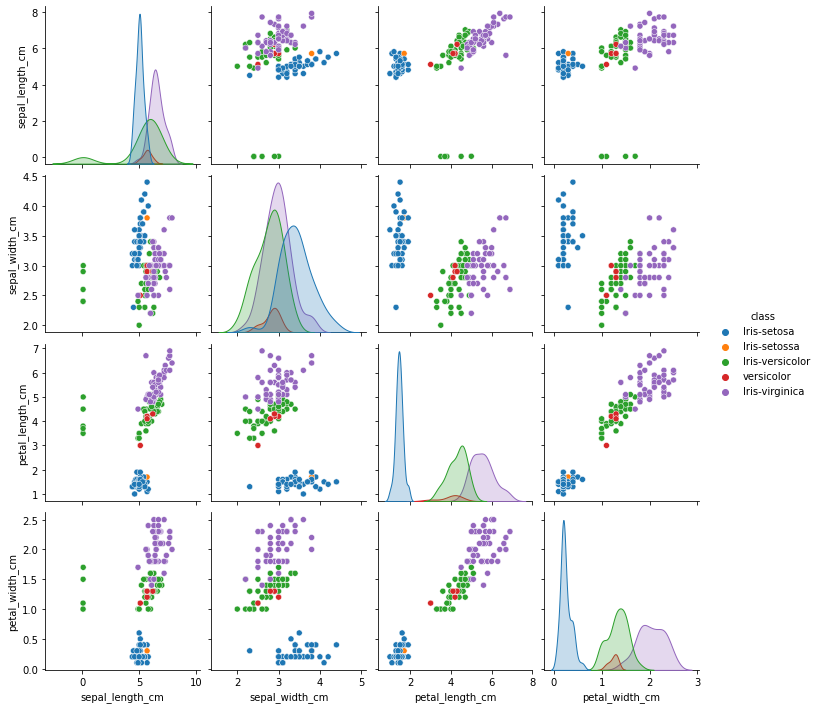

In [6]:
sns.pairplot(df, hue='class', size=2.5)

从图中可以观察到分类名称class，sepal_width 和 sepal_length有一些异常。

1. 分类名称异常

In [7]:
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    45
Iris-setosa        44
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

从上述结果可以看出两点

 - 对于5个数据点，“Iris-versicolor”被指定为“versicolor”
 - 对于1个数据点，'Iris-setosa'被指定为'Iris-setossa'
  
现在将分类名称统一。

In [8]:
df['class'].replace(["Iris-setossa","versicolor"], ["Iris-setosa","Iris-versicolor"], inplace=True)
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        45
Name: class, dtype: int64

2. 数值异常

array([[<AxesSubplot:title={'center':'sepal_length_cm'}>]], dtype=object)

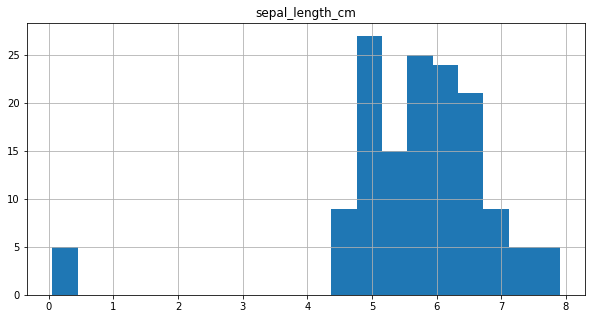

In [9]:
df.hist(column = 'sepal_length_cm',bins=20, figsize=(10,5))

In [10]:
df.loc[df.sepal_length_cm < 1]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


从图中可以观察到，有5个数据点的值低于1，它们似乎是异常值，可能这些数据点的单位应该是“m”，没有转换为“cm”。这里可以统一转换。

array([[<AxesSubplot:title={'center':'sepal_length_cm'}>]], dtype=object)

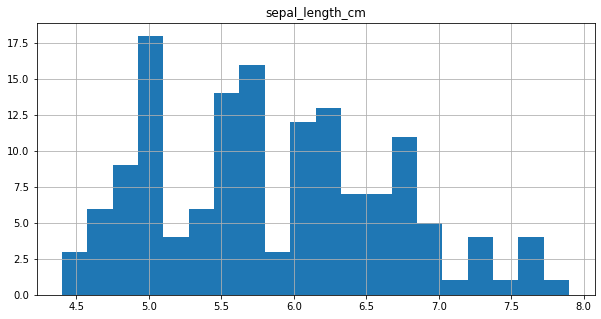

In [11]:
df.loc[df.sepal_length_cm < 1, ['sepal_length_cm']] = df['sepal_length_cm']*100
df.hist(column = 'sepal_length_cm',bins=20, figsize=(10,5))

只考虑'Iris-setosa'和'Iris-versicolor'两个类别，丢弃'Iris-virginica'。

In [12]:
final_df = df[df['class'] != 'Iris-virginica']

c:\Users\mjye\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


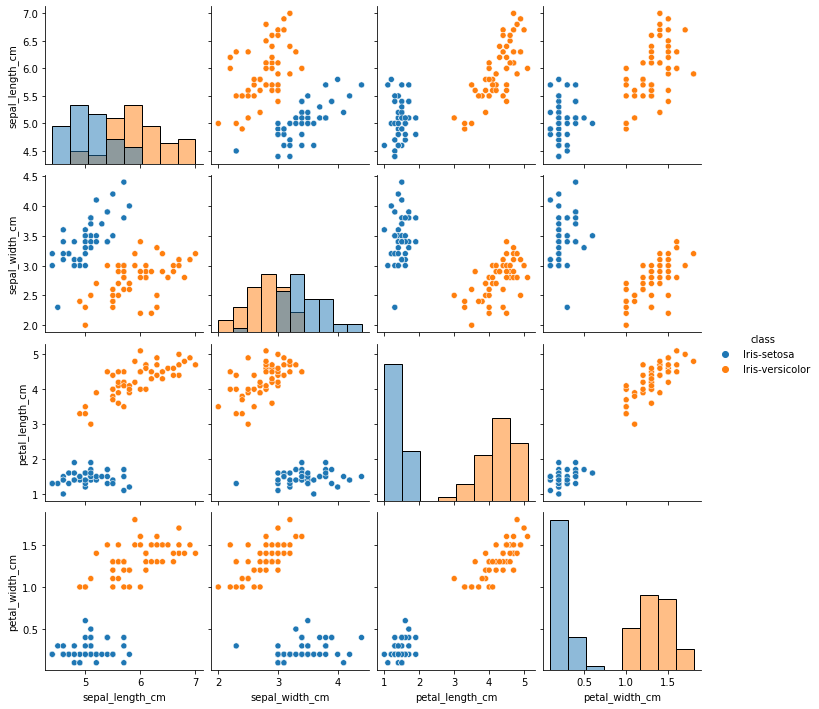

In [13]:
sns.pairplot(final_df, hue='class', size=2.5, diag_kind='hist')

标签编码
 - 可以直接用replace方法，将类别替换为0，1
 - 用sklearn库中labelEncoder转换

In [14]:
final_df['class'].replace(["Iris-setosa","Iris-versicolor"], [1,0])

0     1
1     1
2     1
3     1
4     1
     ..
95    0
96    0
97    0
98    0
99    0
Name: class, Length: 95, dtype: int64

In [15]:
from typing import final
from sklearn.preprocessing import LabelEncoder

lable_encoder = LabelEncoder()
final_df.loc[:, 'class']= lable_encoder.fit_transform(final_df.loc[:, 'class'])

C:\Users\mjye\AppData\Local\Temp\ipykernel_8292\3374088910.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.loc[:, 'class']= lable_encoder.fit_transform(final_df.loc[:, 'class'])


In [16]:
final_df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [17]:
X = final_df.drop(final_df.columns[[4]], axis=1).to_numpy()
y = final_df.drop(final_df.columns[[0,1,2,3]], axis=1).to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## 数据建模 

### numpy implementation

In [19]:
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y
    
def compute_loss(y_true, y_pred):
    #cross entropy
    y1 = y_true * np.log(y_pred + 1e-9)
    y0 = (1 - y_true) * np.log(1 - y_pred + 1e-9)
    return -np.mean(y0 + y1)

In [20]:
def logistic_regression(X, y, learning_rate = 0.001, iterations = 200): 
    
    y = y.reshape(-1,1)

    costs = []
    w = np.zeros((X.shape[1], 1))
    b = 0.0
    m = X.shape[0]
    
    for i in range(iterations):
        y_pred = sigmoid(np.dot(X, w) + b)
        
        cost = compute_loss(y, y_pred)
        
        dw = (1/m)*(np.dot(X.T, (y_pred - y)))
        db = (1/m)*(np.sum(y_pred - y))
        
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
        
        costs.append(cost)
        #print("\nEpoch: {:d} loss: {:.4f} ".format(i+1, costs[-1]), end='')

    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.title('Cost reduction over time')
    return b, w

In [21]:
def predict(b,w, X):
    p1 = sigmoid(np.dot(X, w) + b)
    p0 = 1 - p1
    
    pred_proba = np.hstack((p1, p0))
    
    pred = 1 * (p1 >= p0)
    
    return pred_proba, pred

In [22]:
def model_accuracy(b, w, X, y):    
    _, y_pred = predict(b, w, X)
    acc = 1 - np.mean(np.abs(y - y_pred))
    return acc

train accuracy: 1.0
test accuracy: 1.0


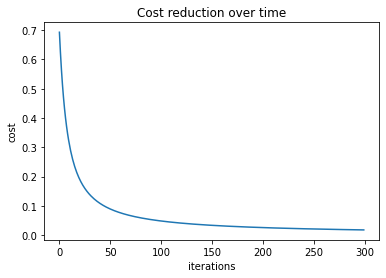

In [23]:
b, w = logistic_regression(X_train, y_train, learning_rate=0.1, iterations=300)
train_accuracy = model_accuracy(b, w, X_train, y_train)
test_accuracy = model_accuracy(b, w, X_test, y_test)

print(f"train accuracy: {train_accuracy}")
print(f"test accuracy: {test_accuracy}")

### Sklearn Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train.ravel())

LogisticRegression()

In [25]:
print(f"train accuracy: {lr.score(X_train, y_train)}")
print(f"test accuracy: {lr.score(X_test, y_test)}")

train accuracy: 1.0
test accuracy: 1.0


In [26]:
print (lr.intercept_, lr.coef_)

[0.44557986] [[ 0.70932884 -1.17744342  1.42618371  1.41923109]]


In [27]:
print(b, w.T)

0.2938836807033254 [[ 0.87406748 -1.29488193  1.54180862  1.51625261]]
